# **Challenge: Data Cleaning**
> Mariana Castro Payns A01706038

> Maria de los Angeles Arista Huerta A01369984

> Marcela Ibarra Mora A01231973

### *Import libraries*

In [1]:
import pandas as pd 
import numpy as np

We will be applying the ETL technique for data cleaning of several data sets that will help make a forecast prediction of sales. 

### *Cleaning the Train Dataset*

The fist data set will be the Train Dataset. 

Foremost we load the corresponding cvs and print a preview of said data. 

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


Then we get the main info of the dataset to get each column along its data type. 
We can see columns like id, date, store number, family, sales and on promotion.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


Then we look for NaN values in the dataset. 

In [4]:
df_train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Since the table above shows a count of 0 NaN values we dont need to transform any of the columns.

We decided to drop the "id" column because we consider it to be irrelevant since pandas gives a default "id".

In [5]:
df_train = df_train.drop(['id'],axis=1)

In [6]:
df_train["date"] = pd.to_datetime(df_train.date)

In [7]:
df_train.describe()

,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


In [8]:
df_train_date = df_train.groupby('date').sum()['sales']
df_train_date.min()

2511.618999

In [9]:
df_train.plot.hist(by='sales')

<AxesSubplot:xlabel='date'>

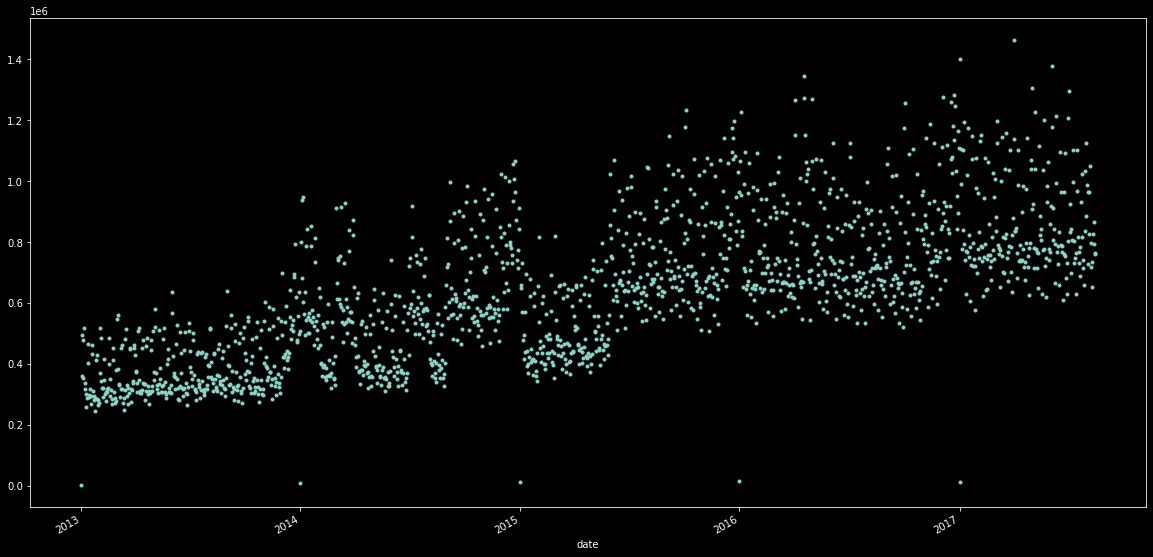

In [ ]:
df_train_date.plot(style='.',figsize = (20, 10))

array([[<AxesSubplot:xlabel='store_nbr', ylabel='store_nbr'>,
        <AxesSubplot:xlabel='sales', ylabel='store_nbr'>,
        <AxesSubplot:xlabel='onpromotion', ylabel='store_nbr'>],
       [<AxesSubplot:xlabel='store_nbr', ylabel='sales'>,
        <AxesSubplot:xlabel='sales', ylabel='sales'>,
        <AxesSubplot:xlabel='onpromotion', ylabel='sales'>],
       [<AxesSubplot:xlabel='store_nbr', ylabel='onpromotion'>,
        <AxesSubplot:xlabel='sales', ylabel='onpromotion'>,
        <AxesSubplot:xlabel='onpromotion', ylabel='onpromotion'>]],
      dtype=object)

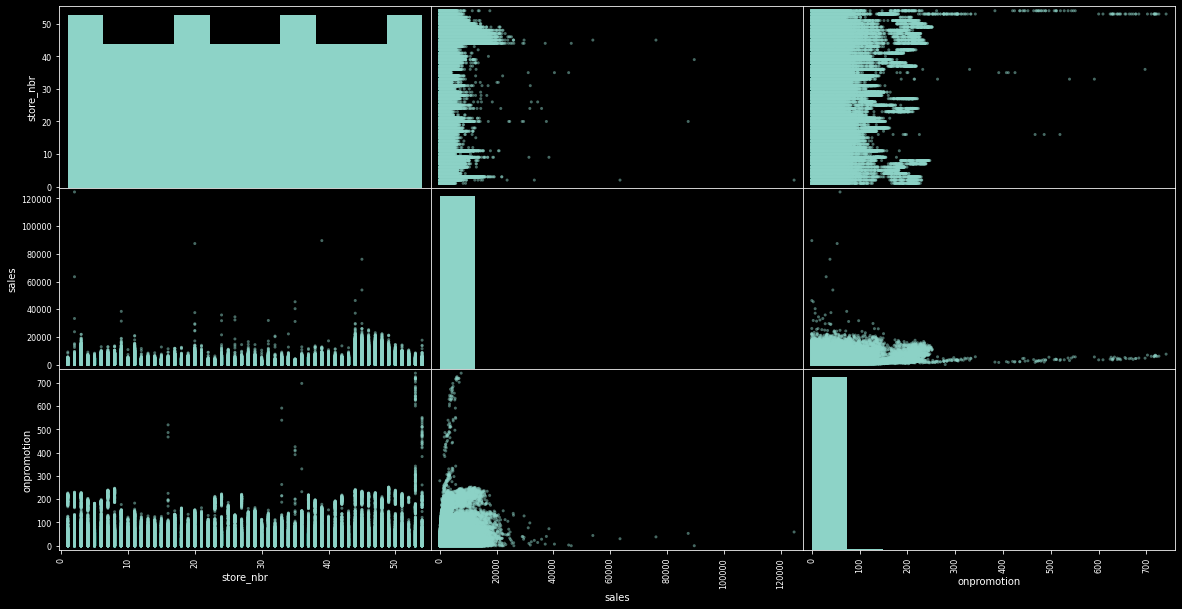

In [ ]:
pd.plotting.scatter_matrix(df_train,figsize = (20, 10))

### *Cleaning the Transactions Dataset*

Now we move to the next dataset being Transactions. 

In [ ]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


The next step will be getting the main info of said data frame to see the number and name of columns, and the data type. We get columns like date, store number and transactions.

In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


Then we check for NaN values in the whole dataset

In [ ]:
df_transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

The result shows a sum of 0 NaN values so there is no need to make a data tranformation for this dataset. 

For visualization porpuses we decided to sort the "store_nbr" column. 

In [ ]:
df_transactions.sort_values(by=['store_nbr'])

,date,store_nbr,transactions
42968,2015-07-03,1,2012
11033,2013-08-28,1,1831
81328,2017-07-07,1,1843
73300,2017-02-07,1,1887
2347,2013-02-22,1,1805
...,...,...,...
50112,2015-11-17,54,744
78033,2017-05-06,54,840
17002,2014-01-03,54,798
20949,2014-03-28,54,839


In [ ]:
df_transactions["date"] = pd.to_datetime(df_transactions.date)
df_transactions_date = df_transactions.groupby('date').sum()['transactions']

<AxesSubplot:xlabel='date'>

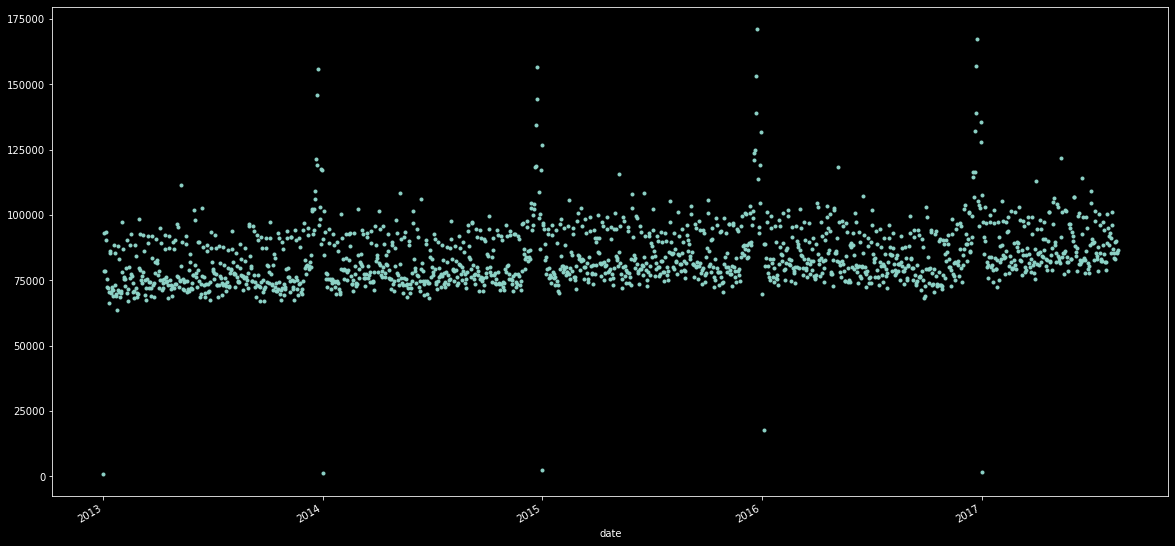

In [ ]:
df_transactions_date.plot(style='.',figsize = (20, 10))

array([[<AxesSubplot:xlabel='store_nbr', ylabel='store_nbr'>,
        <AxesSubplot:xlabel='transactions', ylabel='store_nbr'>],
       [<AxesSubplot:xlabel='store_nbr', ylabel='transactions'>,
        <AxesSubplot:xlabel='transactions', ylabel='transactions'>]],
      dtype=object)

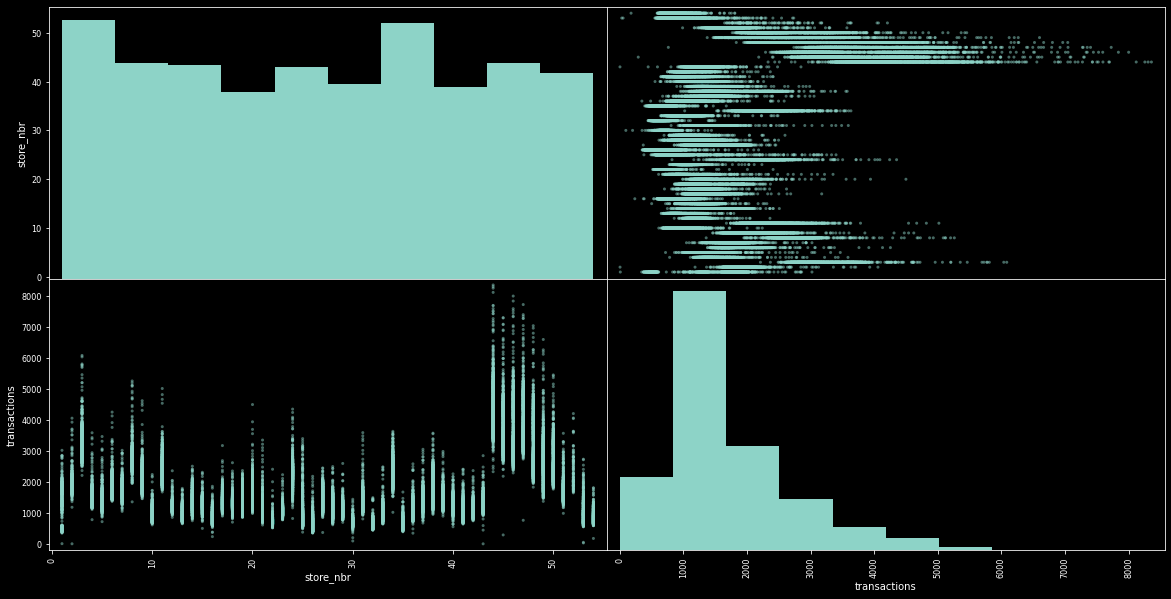

In [ ]:
pd.plotting.scatter_matrix(df_transactions,figsize = (20, 10))

### *Cleaning the Stores Dataset*

Now we move onto the next dataset which is Stores.

In [ ]:
df_stores = pd.read_csv('stores.csv')
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


The next step will be verifing the main dataset info to obtain number of columns, name and data type of each of the columns. From this data set we have columns like store number, city, state, type, cluster. 

In [ ]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


Then its necessary to check for NaN values in the Dataset for each column. 

In [ ]:
df_stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

There is no need to make transformation of data because the sum of NaN values was 0.

In [ ]:
df_stores = df_stores.drop(['state'],axis=1)

In [ ]:
df_stores.head()

,store_nbr,city,type,cluster
0,1,Quito,D,13
1,2,Quito,D,13
2,3,Quito,D,8
3,4,Quito,D,9
4,5,Santo Domingo,D,4
5,6,Quito,D,13
6,7,Quito,D,8
7,8,Quito,D,8
8,9,Quito,B,6
9,10,Quito,C,15


In [ ]:
df_stores['type'].replace({'A':1,'B':2,'C':3,'D':4,'E':5},inplace=True)

array([[<AxesSubplot:xlabel='store_nbr', ylabel='store_nbr'>,
        <AxesSubplot:xlabel='type', ylabel='store_nbr'>,
        <AxesSubplot:xlabel='cluster', ylabel='store_nbr'>],
       [<AxesSubplot:xlabel='store_nbr', ylabel='type'>,
        <AxesSubplot:xlabel='type', ylabel='type'>,
        <AxesSubplot:xlabel='cluster', ylabel='type'>],
       [<AxesSubplot:xlabel='store_nbr', ylabel='cluster'>,
        <AxesSubplot:xlabel='type', ylabel='cluster'>,
        <AxesSubplot:xlabel='cluster', ylabel='cluster'>]], dtype=object)

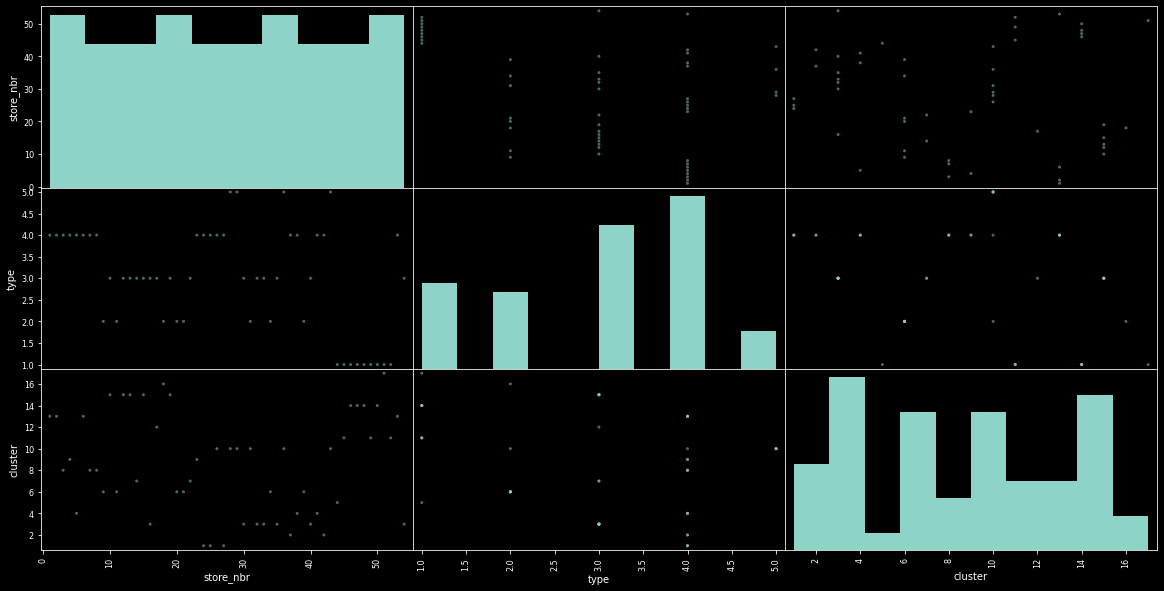

In [ ]:
pd.plotting.scatter_matrix(df_stores,figsize = (20, 10))

### *Cleaning the Oil Dataset*

The next Dataset to clean will be the oil data set. 

In [ ]:
df_oil = pd.read_csv('oil.csv')
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


We get the main info to get the name of the columns and the data type. This dataset contains columns like date and price of oil named as dcoilwtico. 

In [ ]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


Then we check for NaN values in the data set columns. 

In [ ]:
df_oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

Since we have several missing data, we decided to make a transformation. We impute the data by obtaining the mean of the column and replace it on the NaN values.

In [ ]:
mean = df_oil['dcoilwtico'].mean()
mean

67.71436595744689

In [ ]:
df_oil["dcoilwtico"] = df_oil["dcoilwtico"].replace(np.nan, mean)

Once again we check for missing data to confirm the changes made before. Where we get a total of 0 NaN values. 

In [ ]:
df_oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

### *Cleaning the Holidays Dataset*

The next Dataset will be holidays. 

Here we only load the corresponding csv file and get the first 60 values to get a preview. 

In [ ]:
df_holidays = pd.read_csv('holidays_events.csv')
df_holidays.head(60)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


We get the main info of the dataset like number of columns, name and data type. With this we can see that the dataset has columns such as date, type, locale, locale name, description and transferred. 

In [ ]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


Then we check for NaN values in the dataset. 

In [ ]:
df_holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

The count of missing values was 0 so we dont need to make any kind of transformation on the data. 

We decided that the "description" column could be dropped because it has no relevant values for the prediction we are looking to make. 

In [ ]:
df_holidays = df_holidays.drop(["description"],axis=1)

Lastly we check if the drop was made correctly. 

In [ ]:
df_holidays

,date,type,locale,locale_name,transferred
0,2012-03-02,Holiday,Local,Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,False
...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,False
346,2017-12-23,Additional,National,Ecuador,False
347,2017-12-24,Additional,National,Ecuador,False
348,2017-12-25,Holiday,National,Ecuador,False
